In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [3]:
myData = pd.read_csv("Depression.csv")
myData.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [4]:
myData.drop('id', axis=1, inplace=True)

In [5]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
simplicity    82 non-null float64
fatalism      82 non-null float64
depression    82 non-null float64
adjsimp       82 non-null float64
adjfatal      82 non-null float64
adjdep        82 non-null float64
dtypes: float64(6)
memory usage: 4.0 KB


In [6]:
myData.isna().sum()

simplicity    0
fatalism      0
depression    0
adjsimp       0
adjfatal      0
adjdep        0
dtype: int64

In [9]:
myData.describe().T

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


In [15]:
# randomly taking 3 cluster.
kmeans = KMeans(n_clusters=3)

In [16]:
kmeans.fit(myData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
centroids = kmeans.cluster_centers_
centroids

array([[0.99880719, 1.15203031, 1.2364875 , 0.9226225 , 1.10705969,
        1.2072175 ],
       [1.85712923, 1.64644615, 1.69169769, 1.87569692, 1.63098385,
        1.67284692],
       [0.69987919, 0.64138541, 0.5524427 , 0.75924351, 0.68571027,
        0.58437946]])

In [22]:
centroids_df = pd.DataFrame(centroids, columns = myData.columns)
centroids_df
# created centroids for each features based on number of cluster. (in this case its 3)

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,0.998807,1.152030,1.236487,0.922623,1.107060,1.207218
1,1.857129,1.646446,1.691698,1.875697,1.630984,1.672847
2,0.699879,0.641385,0.552443,0.759244,0.685710,0.584379


In [23]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [26]:
# Creating dataset from output/clusters/labels

df_labels = pd.DataFrame(kmeans.labels_, columns = ['labels'])
df_labels['labels'] = df_labels['labels'].astype('category')

df_labels

,labels
0,2
1,2
2,2
3,2
4,2
...,...
77,0
78,1
79,1
80,0


In [27]:
# Adding output/clusters/labels dataset in original dataset

df_labeled = myData.join(df_labels)
df_labeled

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,2
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,2
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,2
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,2
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,2
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,0
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,1
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,1
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,0


In [28]:
df_labeled['labels'].value_counts()

2    37
0    32
1    13
Name: labels, dtype: int64

In [30]:
df_labeled['labels'].value_counts(normalize=True)*100

2    45.121951
0    39.024390
1    15.853659
Name: labels, dtype: float64

### Working Model:
 K means algorithm uses "Euclidean Distance" to find distance between two points. 
    1. Randomly we select point based on Cluster number. For example if cluster number is 3, than we will select 3 different row from the dataset.
    2. We compute euclidean distance for next datapoint.
    3. Now we will check this new datapoint is colse to which cluster.
    4. In this step, we will computer new controid by take last step datapoint.
    5. Again, we will repeat step 2, 3 and 4.
    
   #### OR
   - Step 1: Choose the number of clusters k
   - Step 2: Select k random points from the data as centroids
   - Step 3: Assign all the points to the closest cluster centroid
   - Step 4: Recompute the centroids of newly formed clusters
   - Step 5: Repeat steps 3 and 4


#### What is Clustering?
- Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

#### Properties of Clusters
- Property 1: All the data points in a cluster should be similar to each other.
- Property 2: The data points from different clusters should be as different as possible.


### Use Case :
- Customer Segmentation
- Document Clustering
- Image Segmentation
- Recommendation Engines

### Different Evaluation Metrics for Clustering
1. Inertia
2. Dunn Index

##### Other points on K-Means Clustering

- There is an algorithm that tries to minimize the distance of the points in a cluster with their centroid – the k-means clustering technique.
- The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

#### Stopping Criteria for K-Means Clustering
1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

#### Challenges with the K-Means Clustering Algorithm
1. One of the common challenges we face while working with K-Means is that the size of clusters is different. 
2. Another challenge with k-means is when the densities of the original points are different.

#### How to Choose the Right Number of Clusters in K-Means Clustering?
- elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric.
- the cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data.

Text(0, 0.5, 'Inertia')

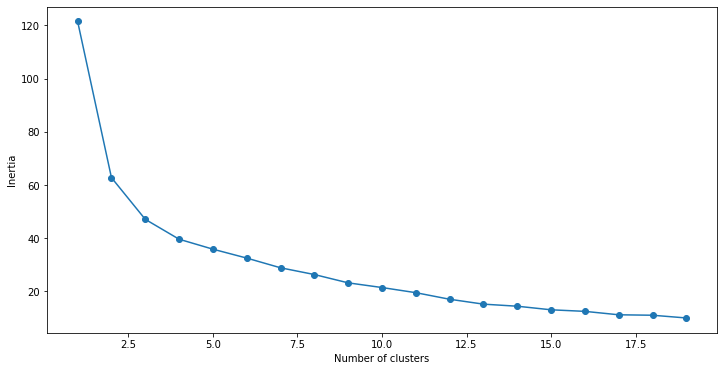

In [32]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(myData)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### Conclusion: we can choose any number of clusters between 3 to 7.

#### Taking Number of Cluster = 5

In [34]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(myData)
kmeans.labels_
df_labels_cluster_5 = pd.DataFrame(kmeans.labels_, columns = ['labels'])
df_labels_cluster_5['labels'] = df_labels_cluster_5['labels'].astype('category')

df_labeled_cluster_5 = myData.join(df_labels_cluster_5)
df_labeled_cluster_5

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,3
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,1
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,3
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,3
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,1
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,0
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,2
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,2
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,0


In [35]:
df_labeled_cluster_5['labels'].value_counts()

1    22
4    18
3    15
0    15
2    12
Name: labels, dtype: int64

In [36]:
df_labeled_cluster_5['labels'].value_counts(normalize=True)*100

1    26.829268
4    21.951220
3    18.292683
0    18.292683
2    14.634146
Name: labels, dtype: float64

# End